In [1]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
election = pd.read_csv('pennsylvania2012_turnout.csv', index_col='county')
election.head()

,state,total,Obama,Romney,winner,voters,turnout,margin
county,,,,,,,,
Adams,PA,41973,35.482334,63.112001,Romney,61156,68.632677,27.629667
Allegheny,PA,614671,56.640219,42.185820,Obama,924351,66.497575,14.454399
Armstrong,PA,28322,30.696985,67.901278,Romney,42147,67.198140,37.204293
Beaver,PA,80015,46.032619,52.637630,Romney,115157,69.483401,6.605012
Bedford,PA,21444,22.057452,76.986570,Romney,32189,66.619031,54.929118


In [3]:
election.loc['Bedford', 'winner']

'Romney'

In [4]:
election.iloc[4, 4]

'Romney'

In [5]:
election[['winner', 'total', 'voters']].head()

,winner,total,voters
county,,,
Adams,Romney,41973,61156
Allegheny,Obama,614671,924351
Armstrong,Romney,28322,42147
Beaver,Romney,80015,115157
Bedford,Romney,21444,32189


In [6]:
election.loc['Perry':'Potter']

,state,total,Obama,Romney,winner,voters,turnout,margin
county,,,,,,,,
Perry,PA,18240,29.769737,68.591009,Romney,27245,66.948064,38.821272
Philadelphia,PA,653598,85.224251,14.051451,Obama,1099197,59.461407,71.172800
Pike,PA,23164,43.904334,54.882576,Romney,41840,55.363289,10.978242
Potter,PA,7205,26.259542,72.158223,Romney,10913,66.022175,45.898681


In [7]:
election.loc['Potter':'Perry':-1]

,state,total,Obama,Romney,winner,voters,turnout,margin
county,,,,,,,,
Potter,PA,7205,26.259542,72.158223,Romney,10913,66.022175,45.898681
Pike,PA,23164,43.904334,54.882576,Romney,41840,55.363289,10.978242
Philadelphia,PA,653598,85.224251,14.051451,Obama,1099197,59.461407,71.172800
Perry,PA,18240,29.769737,68.591009,Romney,27245,66.948064,38.821272


In [8]:
election.loc[:, :'Obama'].head()

,state,total,Obama
county,,,
Adams,PA,41973,35.482334
Allegheny,PA,614671,56.640219
Armstrong,PA,28322,30.696985
Beaver,PA,80015,46.032619
Bedford,PA,21444,22.057452


In [9]:
election.loc[:, 'Obama':'winner'].head()

,Obama,Romney,winner
county,,,
Adams,35.482334,63.112001,Romney
Allegheny,56.640219,42.185820,Obama
Armstrong,30.696985,67.901278,Romney
Beaver,46.032619,52.637630,Romney
Bedford,22.057452,76.986570,Romney


In [10]:
election.loc[:, 'Romney':].head()

,Romney,winner,voters,turnout,margin
county,,,,,
Adams,63.112001,Romney,61156,68.632677,27.629667
Allegheny,42.185820,Obama,924351,66.497575,14.454399
Armstrong,67.901278,Romney,42147,67.198140,37.204293
Beaver,52.637630,Romney,115157,69.483401,6.605012
Bedford,76.986570,Romney,32189,66.619031,54.929118


In [11]:
rows = ['Philadelphia', 'Centre', 'Fulton']
cols = ['winner', 'Obama', 'Romney']
election.loc[rows, cols]

,winner,Obama,Romney
county,,,
Philadelphia,Obama,85.224251,14.051451
Centre,Romney,48.948416,48.977486
Fulton,Romney,21.096291,77.748861


In [12]:
election[election.turnout > 70]

,state,total,Obama,Romney,winner,voters,turnout,margin
county,,,,,,,,
Bucks,PA,319407,49.966970,48.801686,Obama,435606,73.324748,1.165284
Butler,PA,88924,31.920516,66.816607,Romney,122762,72.436096,34.896091
Chester,PA,248295,49.228539,49.650617,Romney,337822,73.498766,0.422079
Forest,PA,2308,38.734835,59.835355,Romney,3232,71.410891,21.100520
Franklin,PA,62802,30.110506,68.583803,Romney,87406,71.850903,38.473297
Montgomery,PA,401787,56.637223,42.286834,Obama,551105,72.905708,14.350390
Westmoreland,PA,168709,37.567646,61.306154,Romney,238006,70.884347,23.738508


In [13]:
election.winner[election.margin < 1] = np.nan
election.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67 entries, Adams to York
Data columns (total 8 columns):
state      67 non-null object
total      67 non-null int64
Obama      67 non-null float64
Romney     67 non-null float64
winner     64 non-null object
voters     67 non-null int64
turnout    67 non-null float64
margin     67 non-null float64
dtypes: float64(4), int64(2), object(2)
memory usage: 7.2+ KB


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
weather = pd.read_csv('pittsburgh2013.csv', index_col='Date', parse_dates=['Date'])
weather.head()

,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,Mean Dew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressureIn,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,32,28,21,30,27,16,100,89,77,30.10,...,10,6,2,10,8,NaN,0.00,8,Snow,277
2013-01-02,25,21,17,14,12,10,77,67,55,30.27,...,10,10,10,14,5,NaN,0.00,4,NaN,272
2013-01-03,32,24,16,19,15,9,77,67,56,30.25,...,10,10,10,17,8,26.0,0.00,3,NaN,229
2013-01-04,30,28,27,21,19,17,75,68,59,30.28,...,10,10,6,23,16,32.0,0.00,4,NaN,250
2013-01-05,34,30,25,23,20,16,75,68,61,30.42,...,10,10,10,16,10,23.0,0.21,5,NaN,221


In [15]:
def to_c(f):
    return 5/9*(f-32)
celsius = weather[['Mean TemperatureF', 'Mean Dew PointF']].apply(to_c)
celsius.columns = ['Mean TemperatureC', 'Mean Dew PointC']
celsius.head()

,Mean TemperatureC,Mean Dew PointC
Date,,
2013-01-01,-2.222222,-2.777778
2013-01-02,-6.111111,-11.111111
2013-01-03,-4.444444,-9.444444
2013-01-04,-2.222222,-7.222222
2013-01-05,-1.111111,-6.666667


In [16]:
redblue = {'Obama':'blue', 'Romney':'red'}
election['color'] = election.winner.map(redblue)
election.head()

,state,total,Obama,Romney,winner,voters,turnout,margin,color
county,,,,,,,,,
Adams,PA,41973,35.482334,63.112001,Romney,61156,68.632677,27.629667,red
Allegheny,PA,614671,56.640219,42.185820,Obama,924351,66.497575,14.454399,blue
Armstrong,PA,28322,30.696985,67.901278,Romney,42147,67.198140,37.204293,red
Beaver,PA,80015,46.032619,52.637630,Romney,115157,69.483401,6.605012,red
Bedford,PA,21444,22.057452,76.986570,Romney,32189,66.619031,54.929118,red


In [17]:
election['turnout_z'] = zscore(election.turnout)
election.head()

,state,total,Obama,Romney,winner,voters,turnout,margin,color,turnout_z
county,,,,,,,,,,
Adams,PA,41973,35.482334,63.112001,Romney,61156,68.632677,27.629667,red,0.853734
Allegheny,PA,614671,56.640219,42.185820,Obama,924351,66.497575,14.454399,blue,0.439846
Armstrong,PA,28322,30.696985,67.901278,Romney,42147,67.198140,37.204293,red,0.575650
Beaver,PA,80015,46.032619,52.637630,Romney,115157,69.483401,6.605012,red,1.018647
Bedford,PA,21444,22.057452,76.986570,Romney,32189,66.619031,54.929118,red,0.463391


In [18]:
sales = pd.read_csv('sales/sales.csv', index_col='month')
sales

,eggs,salt,spam
month,,,
Jan,47,12.0,17
Feb,110,50.0,31
Mar,221,89.0,72
Apr,77,87.0,20
May,132,NaN,52
Jun,205,60.0,55


In [19]:
sales15 = pd.read_csv('sales/sales-feb-2015.csv', index_col='Date', parse_dates=['Date'])
sales15.head()

,Company,Product,Units
Date,,,
2015-02-02 08:30:00,Hooli,Software,3
2015-02-02 21:00:00,Mediacore,Hardware,9
2015-02-03 14:00:00,Initech,Software,13
2015-02-04 15:30:00,Streeplex,Software,13
2015-02-04 22:00:00,Acme Coporation,Hardware,14


In [20]:
sales15.tail()

,Company,Product,Units
Date,,,
2015-02-19 16:00:00,Mediacore,Service,10
2015-02-21 05:00:00,Mediacore,Software,3
2015-02-21 20:30:00,Hooli,Hardware,3
2015-02-25 00:30:00,Initech,Service,10
2015-02-26 09:00:00,Streeplex,Service,4


In [21]:
sales.index = sales.index.str.upper()
sales

,eggs,salt,spam
month,,,
JAN,47,12.0,17
FEB,110,50.0,31
MAR,221,89.0,72
APR,77,87.0,20
MAY,132,NaN,52
JUN,205,60.0,55


In [22]:
sales.index.name = 'MONTHS'
sales

,eggs,salt,spam
MONTHS,,,
JAN,47,12.0,17
FEB,110,50.0,31
MAR,221,89.0,72
APR,77,87.0,20
MAY,132,NaN,52
JUN,205,60.0,55


In [23]:
sales.columns.name = 'PRODUCTS'
sales

PRODUCTS,eggs,salt,spam
MONTHS,,,
JAN,47,12.0,17
FEB,110,50.0,31
MAR,221,89.0,72
APR,77,87.0,20
MAY,132,NaN,52
JUN,205,60.0,55


In [24]:
sales = pd.read_csv('sales/sales.csv')
sales

,month,eggs,salt,spam
0,Jan,47,12.0,17
1,Feb,110,50.0,31
2,Mar,221,89.0,72
3,Apr,77,87.0,20
4,May,132,NaN,52
5,Jun,205,60.0,55


In [25]:
sales.month = [1, 2, 1, 2, 1, 2]

In [26]:
sales['state'] = ['CA', 'CA', 'NY', 'NY', 'TX', 'TX']

In [27]:
sales

,month,eggs,salt,spam,state
0,1,47,12.0,17,CA
1,2,110,50.0,31,CA
2,1,221,89.0,72,NY
3,2,77,87.0,20,NY
4,1,132,NaN,52,TX
5,2,205,60.0,55,TX


In [28]:
sales = sales.set_index(['state', 'month'])

In [29]:
sales.index

MultiIndex(levels=[['CA', 'NY', 'TX'], [1, 2]],
           codes=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]],
           names=['state', 'month'])

In [30]:
sales.loc[['CA', 'TX']]

eggs  salt  spam
state month                  
CA    1        47  12.0    17
      2       110  50.0    31
TX    1       132   NaN    52
      2       205  60.0    55

In [31]:
sales['CA':'TX']

eggs  salt  spam
state month                  
CA    1        47  12.0    17
      2       110  50.0    31
NY    1       221  89.0    72
      2        77  87.0    20
TX    1       132   NaN    52
      2       205  60.0    55

In [32]:
sales = sales.sort_index()
sales

eggs  salt  spam
state month                  
CA    1        47  12.0    17
      2       110  50.0    31
NY    1       221  89.0    72
      2        77  87.0    20
TX    1       132   NaN    52
      2       205  60.0    55

In [33]:
sales.loc['NY']

,eggs,salt,spam
month,,,
1,221,89.0,72
2,77,87.0,20


In [34]:
sales.loc[('NY', 1), :]

eggs    221.0
salt     89.0
spam     72.0
Name: (NY, 1), dtype: float64

In [35]:
sales.loc[(['CA', 'TX'], 2), :]

,,eggs,salt,spam
state,month,,,
CA,2,110,50.0,31
TX,2,205,60.0,55


In [36]:
sales.loc[(slice(None), 2), :]

,,eggs,salt,spam
state,month,,,
CA,2,110,50.0,31
NY,2,77,87.0,20
TX,2,205,60.0,55


In [37]:
sales.loc[(['CA', 'TX'], [1, 2]),:]

eggs  salt  spam
state month                  
CA    1        47  12.0    17
      2       110  50.0    31
TX    1       132   NaN    52
      2       205  60.0    55

In [38]:
users = pd.read_csv('users.csv', index_col=0)
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 3
Data columns (total 4 columns):
weekday     4 non-null object
city        4 non-null object
visitors    4 non-null int64
signups     4 non-null int64
dtypes: int64(2), object(2)
memory usage: 160.0+ bytes


In [39]:
users

,weekday,city,visitors,signups
0,Sun,Austin,139,7
1,Sun,Dallas,237,12
2,Mon,Austin,326,3
3,Mon,Dallas,456,5


In [40]:
visitors = users.pivot(index='weekday', columns='city', values='visitors')
visitors

city,Austin,Dallas
weekday,,
Mon,326,456
Sun,139,237


In [41]:
signups = users.pivot(index='weekday', columns='city', values='signups')
signups

city,Austin,Dallas
weekday,,
Mon,3,5
Sun,7,12


In [42]:
pivot = users.pivot(index='weekday', columns='city')
pivot

visitors        signups       
city      Austin Dallas  Austin Dallas
weekday                               
Mon          326    456       3      5
Sun          139    237       7     12

In [43]:
pivot.columns

MultiIndex(levels=[['visitors', 'signups'], ['Austin', 'Dallas']],
           codes=[[0, 0, 1, 1], [0, 1, 0, 1]],
           names=[None, 'city'])

In [44]:
pivot.loc['Mon', ('visitors', ['Austin', 'Dallas'])]

          city  
visitors  Austin    326
          Dallas    456
Name: Mon, dtype: int64

In [45]:
pivot.loc['Mon', 'visitors']

city
Austin    326
Dallas    456
Name: Mon, dtype: int64

In [46]:
pivot.loc[('Mon', 'Sun'), ('visitors')]

city,Austin,Dallas
weekday,,
Mon,326,456
Sun,139,237


In [47]:
users_indexed = users.set_index(['city', 'weekday'])
users_indexed

,,visitors,signups
city,weekday,,
Austin,Sun,139,7
Dallas,Sun,237,12
Austin,Mon,326,3
Dallas,Mon,456,5


In [48]:
users_indexed_sorted = users_indexed.sort_index()
users_indexed_sorted

visitors  signups
city   weekday                   
Austin Mon           326        3
       Sun           139        7
Dallas Mon           456        5
       Sun           237       12

In [49]:
bycity = users_indexed_sorted.unstack('city')
bycity

visitors        signups       
city      Austin Dallas  Austin Dallas
weekday                               
Mon          326    456       3      5
Sun          139    237       7     12

In [50]:
bycity_stacked = bycity.stack('city')
bycity_stacked

visitors  signups
weekday city                     
Mon     Austin       326        3
        Dallas       456        5
Sun     Austin       139        7
        Dallas       237       12

In [51]:
bycity_stacked_swapped = bycity_stacked.swaplevel(0, 1)
bycity_stacked_swapped

,,visitors,signups
city,weekday,,
Austin,Mon,326,3
Dallas,Mon,456,5
Austin,Sun,139,7
Dallas,Sun,237,12


In [52]:
bycity_stacked_swapped_sorted = bycity_stacked_swapped.sort_index()
bycity_stacked_swapped_sorted.equals(users_indexed_sorted)

True

In [53]:
users

,weekday,city,visitors,signups
0,Sun,Austin,139,7
1,Sun,Dallas,237,12
2,Mon,Austin,326,3
3,Mon,Dallas,456,5


In [54]:
visitors_by_city_weekday = users.pivot(index='weekday', columns='city', values='visitors')
visitors_by_city_weekday

city,Austin,Dallas
weekday,,
Mon,326,456
Sun,139,237


In [55]:
visitors_by_city_weekday.reset_index()

city,weekday,Austin,Dallas
0,Mon,326,456
1,Sun,139,237


In [56]:
pd.melt(visitors_by_city_weekday.reset_index(), id_vars=['weekday'], value_name='visitors')

,weekday,city,visitors
0,Mon,Austin,326
1,Sun,Austin,139
2,Mon,Dallas,456
3,Sun,Dallas,237


In [57]:
pd.melt(users, id_vars=['weekday', 'city'])

,weekday,city,variable,value
0,Sun,Austin,visitors,139
1,Sun,Dallas,visitors,237
2,Mon,Austin,visitors,326
3,Mon,Dallas,visitors,456
4,Sun,Austin,signups,7
5,Sun,Dallas,signups,12
6,Mon,Austin,signups,3
7,Mon,Dallas,signups,5


In [58]:
users_indexed

,,visitors,signups
city,weekday,,
Austin,Sun,139,7
Dallas,Sun,237,12
Austin,Mon,326,3
Dallas,Mon,456,5


In [59]:
pd.melt(users_indexed, col_level=0)

,variable,value
0,visitors,139
1,visitors,237
2,visitors,326
3,visitors,456
4,signups,7
5,signups,12
6,signups,3
7,signups,5


In [60]:
users

,weekday,city,visitors,signups
0,Sun,Austin,139,7
1,Sun,Dallas,237,12
2,Mon,Austin,326,3
3,Mon,Dallas,456,5


In [61]:
users.pivot_table(index='weekday', columns='city')

signups        visitors       
city     Austin Dallas   Austin Dallas
weekday                               
Mon           3      5      326    456
Sun           7     12      139    237

In [62]:
users.pivot_table(index='weekday', aggfunc='count')

,city,signups,visitors
weekday,,,
Mon,2,2,2
Sun,2,2,2


In [63]:
users.pivot_table(index='weekday', aggfunc=len)

,city,signups,visitors
weekday,,,
Mon,2,2,2
Sun,2,2,2


In [64]:
users.pivot_table(index='weekday', aggfunc=sum)

,signups,visitors
weekday,,
Mon,8,782
Sun,19,376


In [65]:
users.pivot_table(index='weekday', aggfunc=sum, margins=True)

,signups,visitors
weekday,,
Mon,8,782
Sun,19,376
All,27,1158


In [66]:
titanic = pd.read_csv('titanic.csv')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


In [67]:
by_class = titanic.groupby('pclass')
count_by_class = by_class.survived.count()
print(count_by_class)

pclass
1    323
2    277
3    709
Name: survived, dtype: int64


In [68]:
by_mult = titanic.groupby(['embarked', 'pclass'])
count_by_mult = by_mult.survived.count()
count_by_mult

embarked  pclass
C         1         141
          2          28
          3         101
Q         1           3
          2           7
          3         113
S         1         177
          2         242
          3         495
Name: survived, dtype: int64

In [69]:
from urllib.request import urlretrieve
url = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1650/datasets/life_expectancy.csv'
urlretrieve(url, 'life_expectancy.csv')

('life_expectancy.csv', <http.client.HTTPMessage at 0x1a20c5b160>)

In [70]:
url2 = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1650/datasets/regions.csv'
urlretrieve(url2, 'regions.csv')

('regions.csv', <http.client.HTTPMessage at 0x1a20c5b748>)

In [71]:
life = pd.read_csv('life_expectancy.csv')
life.head()

,Country,1964,1965,1966,1967,1968,1969,1970,1971,1972,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,33.639,34.152,34.662,35.170,35.674,36.172,36.663,37.143,37.614,...,56.583,57.071,57.582,58.102,58.618,59.124,59.612,60.079,60.524,60.947
1,Albania,65.475,65.863,66.122,66.316,66.500,66.702,66.948,67.251,67.595,...,75.725,75.949,76.124,76.278,76.433,76.598,76.780,76.979,77.185,77.392
2,Algeria,47.953,48.389,48.806,49.205,49.592,49.976,50.366,50.767,51.195,...,69.682,69.854,70.020,70.180,70.332,70.477,70.615,70.747,70.874,71.000
3,Angola,34.604,35.007,35.410,35.816,36.222,36.627,37.032,37.439,37.846,...,48.036,48.572,49.041,49.471,49.882,50.286,50.689,51.094,51.498,51.899
4,Antigua and Barbuda,63.775,64.149,64.511,64.865,65.213,65.558,65.898,66.232,66.558,...,74.355,74.544,74.729,74.910,75.087,75.263,75.437,75.610,75.783,75.954


In [72]:
regions = pd.read_csv('regions.csv')
regions.head()

,Country,region
0,Afghanistan,South Asia
1,Albania,Europe & Central Asia
2,Algeria,Middle East & North Africa
3,Angola,Sub-Saharan Africa
4,Antigua and Barbuda,America


In [73]:
life_by_region = life.groupby(regions.region)
life_by_region['2010'].mean()

region
America                       74.037350
East Asia & Pacific           73.405750
Europe & Central Asia         75.656387
Middle East & North Africa    72.805333
South Asia                    68.189750
Sub-Saharan Africa            57.575080
Name: 2010, dtype: float64

In [74]:
by_class_sub = by_class[['age', 'fare']]
aggregated = by_class_sub.agg(['max', 'median'])
aggregated

age             fare         
         max median       max   median
pclass                                
1       80.0   39.0  512.3292  60.0000
2       70.0   29.0   73.5000  15.0458
3       74.0   24.0   69.5500   8.0500

In [75]:
aggregated.loc[:, ('age', 'max')]

pclass
1    80.0
2    70.0
3    74.0
Name: (age, max), dtype: float64

In [76]:
aggregated.loc[:, ('fare', 'median')]

pclass
1    60.0000
2    15.0458
3     8.0500
Name: (fare, median), dtype: float64

In [77]:
gap = pd.read_csv('gapminder_tidy.csv', index_col=['Year', 'region', 'Country']).sort_index()
gap.head()

fertility    life  population  \
Year region  Country                                              
1964 America Antigua and Barbuda      4.250  63.775     58653.0   
             Argentina                3.068  65.388  21966478.0   
             Aruba                    4.059  67.113     57031.0   
             Bahamas                  4.220  64.189    133709.0   
             Barbados                 4.094  62.819    234455.0   

                                  child_mortality      gdp  
Year region  Country                                        
1964 America Antigua and Barbuda            72.78   5008.0  
             Argentina                      57.43   8227.0  
             Aruba                            NaN   5505.0  
             Bahamas                        48.56  18160.0  
             Barbados                       64.70   5681.0

In [78]:
gap.tail()

fertility    life  population  \
Year region             Country                                   
2013 Sub-Saharan Africa Tanzania      5.214  61.530  49153002.0   
                        Togo          4.639  56.537   6412560.0   
                        Uganda        5.867  59.209  36759274.0   
                        Zambia        5.687  58.105  14314515.0   
                        Zimbabwe      3.486  59.871  13327925.0   

                                  child_mortality     gdp  
Year region             Country                            
2013 Sub-Saharan Africa Tanzania             52.6  2382.0  
                        Togo                 83.3  1346.0  
                        Uganda               65.1  1621.0  
                        Zambia               72.8  3800.0  
                        Zimbabwe             83.3  1773.0

In [79]:
def spread(series):
    return series.max() - series.min()

In [80]:
aggregator = {'population': 'sum', 'child_mortality': 'mean', 'gdp': spread}

In [81]:
aggregated = gap.groupby(level=['Year', 'region']).agg(aggregator)
aggregated.loc[1964, :]

,population,child_mortality,gdp
region,,,
America,4.621957e+08,113.950667,18314.0
East Asia & Pacific,1.110668e+09,129.109130,66821.0
Europe & Central Asia,6.988545e+08,61.585319,28734.0
Middle East & North Africa,1.180955e+08,179.605263,38474.0
South Asia,6.250739e+08,256.922500,812.0
Sub-Saharan Africa,2.541011e+08,243.872766,8613.0


In [82]:
aggregated.loc[2013, :]

,population,child_mortality,gdp
region,,,
America,9.629087e+08,17.745833,49634.0
East Asia & Pacific,2.244209e+09,22.285714,134744.0
Europe & Central Asia,8.968788e+08,9.831875,86418.0
Middle East & North Africa,4.030504e+08,20.221500,128676.0
South Asia,1.701241e+09,46.287500,11469.0
Sub-Saharan Africa,9.205996e+08,76.944490,32035.0


In [83]:
sales = pd.read_csv('sales/sales-feb-2015.csv', index_col='Date', parse_dates=True)
sales

,Company,Product,Units
Date,,,
2015-02-02 08:30:00,Hooli,Software,3
2015-02-02 21:00:00,Mediacore,Hardware,9
2015-02-03 14:00:00,Initech,Software,13
2015-02-04 15:30:00,Streeplex,Software,13
2015-02-04 22:00:00,Acme Coporation,Hardware,14
2015-02-05 02:00:00,Acme Coporation,Software,19
2015-02-05 22:00:00,Hooli,Service,10
2015-02-07 23:00:00,Acme Coporation,Hardware,1
2015-02-09 09:00:00,Streeplex,Service,19


In [84]:
by_day = sales.groupby(sales.index.strftime('%a'))
by_day.Units.sum()

Mon    48
Sat     7
Thu    59
Tue    13
Wed    48
Name: Units, dtype: int64

In [85]:
standardized = gap.groupby('region')['life', 'fertility'].transform(zscore)

In [86]:
outliers = (standardized['life'] < -3) | (standardized['fertility'] > 3)

In [87]:
gap.loc[outliers]

fertility    life  population  \
Year region                     Country                                       
1964 America                    Bolivia           6.607  43.913   3668568.0   
                                Guatemala         6.434  47.884   4636016.0   
                                Haiti             6.233  44.464   4188276.0   
     East Asia & Pacific        Timor-Leste       6.347  35.724    537278.0   
     Europe & Central Asia      Turkey            6.029  48.313  31109820.0   
                                Turkmenistan      6.663  56.181   1829697.0   
     Middle East & North Africa Yemen, Rep.       7.385  36.068   5527652.0   
1965 America                    Bolivia           6.593  44.229   3752892.0   
                                Haiti             6.179  45.006   4272760.0   
     East Asia & Pacific        Timor-Leste       6.314  36.263    547681.0   
     Europe & Central Asia      Turkey            5.951  49.037  31837999.0   
     Middle East & North Africa Yemen, Rep.       7.418  36.957   5632206.0   
1966 America                    Bolivia           6.586  44.536   3839751.0   
                                Haiti             6.109  45.518   4359031.0   
     East Asia & Pacific        Timor-Leste       6.268  36.885    558110.0   
     Europe & Central Asia      Turkey            5.874  49.736  32556294.0   
     Middle East & North Africa Yemen, Rep.       7.447  37.827   5737000.0   
1967 America                    Bolivia           6.585  44.835   3929192.0   
                                Haiti             6.026  45.994   4446944.0   
     Europe & Central Asia      Turkey            5.797  50.409  33267998.0   
1968 America                    Bolivia           6.587  45.132   4021551.0   
                                Haiti             5.937  46.430   4535485.0   
     Europe & Central Asia      Turkey            5.721  51.057  33982141.0   
1969 America                    Bolivia           6.587  45.436   4117259.0   
                                Haiti             5.847  46.831   4623315.0   
     Europe & Central Asia      Turkey            5.644  51.683  34711167.0   
1970 America                    Bolivia           6.578  45.765   4216572.0   
                                Haiti             5.762  47.204   4709644.0   
     Europe & Central Asia      Turkey            5.563  52.291  35464196.0   
1971 America                    Bolivia           6.549  46.135   4319564.0   
...                                                 ...     ...         ...   
1972 America                    Bolivia           6.496  46.563   4426012.0   
                                Haiti             5.643  47.915   4877645.0   
     Europe & Central Asia      Turkey            5.375  53.498  37054168.0   
1973 America                    Bolivia           6.415  47.055   4535500.0   
                                Haiti             5.616  48.276   4961817.0   
     East Asia & Pacific        Cambodia          5.988  35.800   7162333.0   
     Europe & Central Asia      Turkey            5.263  54.115  37884870.0   
1974 America                    Bolivia           6.310  47.614   4647442.0   
     East Asia & Pacific        Cambodia          5.795  33.100   7157572.0   
                                Timor-Leste       5.037  36.648    662785.0   
     Europe & Central Asia      Turkey            5.140  54.746  38730367.0   
1975 America                    Bolivia           6.183  48.242   4761344.0   
     East Asia & Pacific        Cambodia          5.622  19.800   7097800.0   
                                Timor-Leste       4.794  35.080    662962.0   
     Europe & Central Asia      Turkey            5.008  55.392  39585821.0   
1976 East Asia & Pacific        Cambodia          5.498  17.100   6972559.0   
                                Timor-Leste       4.611  33.702    652072.0   
     Europe & Central Asia      Turkey            4.872  56.050  40446729.0   
1977 East Asia & 

In [88]:
def impute_median(series):
    return series.fillna(series.median())

In [89]:
by_sex_class = titanic.groupby(['sex', 'pclass'])
titanic['age'] = by_sex_class['age'].transform(impute_median)
titanic.tail(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1299,3,0,"Yasbeck, Mr. Antoni",male,27.0,1,0,2659,14.4542,NaN,C,C,NaN,NaN
1300,3,1,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542,NaN,C,NaN,NaN,NaN
1301,3,0,"Youseff, Mr. Gerious",male,45.5,0,0,2628,7.2250,NaN,C,NaN,312.0,NaN
1302,3,0,"Yousif, Mr. Wazli",male,25.0,0,0,2647,7.2250,NaN,C,NaN,NaN,NaN
1303,3,0,"Yousseff, Mr. Gerious",male,25.0,0,0,2627,14.4583,NaN,C,NaN,NaN,NaN
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,22.0,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [90]:
def disparity(gr):
    # Compute the spread of gr['gdp']: s
    s = gr['gdp'].max() - gr['gdp'].min()
    # Compute the z-score of gr['gdp'] as (gr['gdp']-gr['gdp'].mean())/gr['gdp'].std(): z
    z = (gr['gdp'] - gr['gdp'].mean())/gr['gdp'].std()
    # Return a DataFrame with the inputs {'z(gdp)':z, 'regional spread(gdp)':s}
    return pd.DataFrame({'z(gdp)':z , 'regional spread(gdp)':s})

In [91]:
regional = gap.loc[2010].groupby('region')
regional_disparity = regional.apply(disparity)
regional_disparity.loc['East Asia & Pacific']

,z(gdp),regional spread(gdp)
Country,,
Australia,0.776896,96993.0
Brunei,1.888183,96993.0
Cambodia,-0.695049,96993.0
China,-0.432756,96993.0
Fiji,-0.521186,96993.0
French Polynesia,NaN,96993.0
Guam,NaN,96993.0
"Hong Kong, China",1.033918,96993.0
Indonesia,-0.468098,96993.0


In [92]:
regional_disparity.loc[(['America', 'East Asia & Pacific'], ['United States', 'Singapore', 'Vietnam']), :]

z(gdp)  regional spread(gdp)
region              Country                                      
America             United States  3.013374               47855.0
East Asia & Pacific Singapore      1.942029               96993.0
                    Vietnam       -0.620233               96993.0

In [93]:
def c_deck_survival(gr):

    c_passengers = gr['cabin'].str.startswith('C').fillna(False)

    return gr.loc[c_passengers, 'survived'].mean()


In [94]:
sexual = titanic.groupby('sex')
sexual.apply(c_deck_survival)

sex
female    0.913043
male      0.312500
dtype: float64

In [95]:
sales

,Company,Product,Units
Date,,,
2015-02-02 08:30:00,Hooli,Software,3
2015-02-02 21:00:00,Mediacore,Hardware,9
2015-02-03 14:00:00,Initech,Software,13
2015-02-04 15:30:00,Streeplex,Software,13
2015-02-04 22:00:00,Acme Coporation,Hardware,14
2015-02-05 02:00:00,Acme Coporation,Software,19
2015-02-05 22:00:00,Hooli,Service,10
2015-02-07 23:00:00,Acme Coporation,Hardware,1
2015-02-09 09:00:00,Streeplex,Service,19


In [96]:
by_company = sales.groupby('Company')
by_company['Units'].sum()

Company
Acme Coporation    34
Hooli              30
Initech            30
Mediacore          45
Streeplex          36
Name: Units, dtype: int64

In [97]:
by_company.filter(lambda g: g.Units.sum() > 35)

,Company,Product,Units
Date,,,
2015-02-02 21:00:00,Mediacore,Hardware,9
2015-02-04 15:30:00,Streeplex,Software,13
2015-02-09 09:00:00,Streeplex,Service,19
2015-02-09 13:00:00,Mediacore,Software,7
2015-02-19 11:00:00,Mediacore,Hardware,16
2015-02-19 16:00:00,Mediacore,Service,10
2015-02-21 05:00:00,Mediacore,Software,3
2015-02-26 09:00:00,Streeplex,Service,4


In [98]:
under10 = (titanic['age'] < 10).map({True:'under 10', False:'over 10'})
titanic.groupby(under10).survived.mean()

age
over 10     0.366748
under 10    0.609756
Name: survived, dtype: float64

In [99]:
titanic.groupby([under10, 'pclass']).survived.mean()

age       pclass
over 10   1         0.617555
          2         0.380392
          3         0.238897
under 10  1         0.750000
          2         1.000000
          3         0.446429
Name: survived, dtype: float64

In [100]:
medals = pd.read_csv('all_medalists.csv')
medals.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


In [101]:
USA_edition_grouped = medals.loc[medals.NOC == 'USA'].groupby('Edition')
USA_edition_grouped['Medal'].count()

Edition
1896     20
1900     55
1904    394
1908     63
1912    101
1920    193
1924    198
1928     84
1932    181
1936     92
1948    148
1952    130
1956    118
1960    112
1964    150
1968    149
1972    155
1976    155
1984    333
1988    193
1992    224
1996    260
2000    248
2004    264
2008    315
Name: Medal, dtype: int64

In [102]:
countries = medals['NOC']
medal_counts = countries.value_counts()
medal_counts.head()

USA    4335
URS    2049
GBR    1594
FRA    1314
ITA    1228
Name: NOC, dtype: int64

In [106]:
counted = medals.pivot_table(aggfunc='count', index='NOC', values='Athlete', columns='Medal')
counted.head()

Medal,Bronze,Gold,Silver
NOC,,,
AFG,1.0,NaN,NaN
AHO,NaN,NaN,1.0
ALG,8.0,4.0,2.0
ANZ,5.0,20.0,4.0
ARG,88.0,68.0,83.0


In [107]:
counted['totals'] = counted.sum(axis='columns')
counted = counted.sort_values('totals', ascending=False)
counted.head()

Medal,Bronze,Gold,Silver,totals
NOC,,,,
USA,1052.0,2088.0,1195.0,4335.0
URS,584.0,838.0,627.0,2049.0
GBR,505.0,498.0,591.0,1594.0
FRA,475.0,378.0,461.0,1314.0
ITA,374.0,460.0,394.0,1228.0


In [108]:
ev_gen = medals[['Event_gender', 'Gender']]
ev_gen_uniques = ev_gen.drop_duplicates()
ev_gen_uniques

,Event_gender,Gender
0,M,Men
348,X,Men
416,W,Women
639,X,Women
23675,W,Men


In [109]:
medals_by_gender = medals.groupby(['Event_gender', 'Gender'])
medal_count_by_gender = medals_by_gender.count()
medal_count_by_gender

City  Edition  Sport  Discipline  Athlete    NOC  Event  \
Event_gender Gender                                                             
M            Men     20067    20067  20067       20067    20067  20067  20067   
W            Men         1        1      1           1        1      1      1   
             Women    7277     7277   7277        7277     7277   7277   7277   
X            Men      1653     1653   1653        1653     1653   1653   1653   
             Women     218      218    218         218      218    218    218   

                     Medal  
Event_gender Gender         
M            Men     20067  
W            Men         1  
             Women    7277  
X            Men      1653  
             Women     218

In [113]:
country_grouped = medals.groupby('NOC')
Nsports = country_grouped['Sport'].nunique()
Nsports = Nsports.sort_values(ascending=False)
Nsports.head()

NOC
USA    34
GBR    31
FRA    28
GER    26
CHN    24
Name: Sport, dtype: int64

In [114]:
cold_war = (medals.Edition >= 1952) & (medals.Edition <= 1988)
usa_urs = medals.NOC.isin(['USA', 'URS'])
cold_war_medals = medals.loc[cold_war & usa_urs]
cold_war_medals.groupby('NOC')['Sport'].nunique().sort_values(ascending=False)

NOC
URS    21
USA    20
Name: Sport, dtype: int64

In [116]:
medals_by_country = medals.pivot_table(index='Edition', columns='NOC', values='Athlete', aggfunc='count')
medals_coldwar_usaurs = medals_by_country.loc[1952:1988, ['USA', 'URS']]
medals_coldwar_usaurs

NOC,USA,URS
Edition,,
1952,130.0,117.0
1956,118.0,169.0
1960,112.0,169.0
1964,150.0,174.0
1968,149.0,188.0
1972,155.0,211.0
1976,155.0,285.0
1980,NaN,442.0
1984,333.0,NaN


In [120]:
medals_coldwar_usaurs.idxmax(axis='columns').value_counts()

URS    8
USA    2
dtype: int64

In [126]:
medals.Medal = pd.Categorical(values=medals.Medal, 
                              categories=['Bronze', 'Silver', 'Gold'], 
                              ordered=True)
usa = medals[medals['NOC'] == 'USA']
usa_medals_by_year = usa.groupby(['Edition', 'Medal']).Athlete.count()
usa_medals_by_year

Edition  Medal 
1896     Bronze      2
         Silver      7
         Gold       11
1900     Bronze     14
         Silver     14
         Gold       27
1904     Bronze    111
         Silver    137
         Gold      146
1908     Bronze     15
         Silver     14
         Gold       34
1912     Bronze     31
         Silver     25
         Gold       45
1920     Bronze     38
         Silver     45
         Gold      110
1924     Bronze     51
         Silver     37
         Gold      110
1928     Bronze     17
         Silver     24
         Gold       43
1932     Bronze     59
         Silver     44
         Gold       78
1936     Bronze     15
         Silver     26
         Gold       51
                  ... 
1968     Bronze     35
         Silver     31
         Gold       83
1972     Bronze     43
         Silver     59
         Gold       53
1976     Bronze     36
         Silver     56
         Gold       63
1984     Bronze     50
         Silver    115
         Gold     

In [127]:
usa_medals_by_year_unstacked = usa_medals_by_year.unstack(level='Medal')
usa_medals_by_year_unstacked

Medal,Bronze,Silver,Gold
Edition,,,
1896,2,7,11
1900,14,14,27
1904,111,137,146
1908,15,14,34
1912,31,25,45
1920,38,45,110
1924,51,37,110
1928,17,24,43
1932,59,44,78


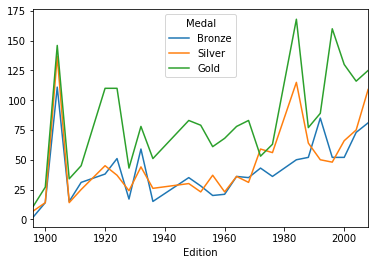

In [128]:
usa_medals_by_year_unstacked.plot()

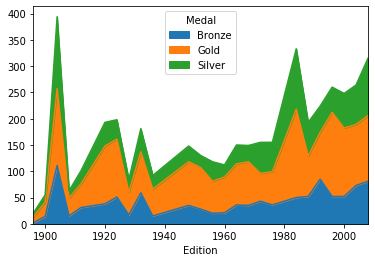

In [125]:
usa_medals_by_year_unstacked.plot.area()